# Linear Regression on Auto Dataset - user input

### Import Libraries

In [106]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to avoid warning
import warnings
warnings.filterwarnings("ignore")

# Problem Statement

To predict price of the cars by using supervised machine learning considering as a regression problem.

# Data Gathering

In [107]:
df=pd.read_csv("autos_dataset.csv")


In [108]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
normalized-losses,?,?,?,164,164,?,158,?,158,?,...,74,103,74,103,74,95,95,95,95,95
make,alfa-romero,alfa-romero,alfa-romero,audi,audi,audi,audi,audi,audi,audi,...,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo,volvo
fuel-type,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,...,gas,gas,gas,gas,gas,gas,gas,gas,diesel,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,...,std,std,std,turbo,turbo,std,turbo,std,turbo,turbo
num-of-doors,two,two,two,four,four,two,four,four,four,two,...,four,four,four,four,four,four,four,four,four,four
body-style,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,...,wagon,sedan,wagon,sedan,wagon,sedan,sedan,sedan,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
engine-location,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1


# EDA

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [110]:
df.isna().sum()   #Checking for null values

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# 1. Symboling

In [111]:
df['symboling']

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64

In [112]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [113]:
df['symboling'].value_counts()

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

# 2. Normalized-losses

In [114]:
df['normalized-losses']

0        ?
1        ?
2        ?
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [115]:
df['normalized-losses'].value_counts()

normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64

In [116]:
df['normalized-losses'].replace({'?':np.nan},inplace=True)

In [117]:
df['normalized-losses'].isna().sum()

41

In [118]:
df['normalized-losses'].fillna(df['normalized-losses'].median(),inplace=True)

In [119]:
df['normalized-losses']

0      115.0
1      115.0
2      115.0
3        164
4        164
       ...  
200       95
201       95
202       95
203       95
204       95
Name: normalized-losses, Length: 205, dtype: object

In [120]:
df['normalized-losses'].isna().sum()

0

In [121]:
df['normalized-losses']=df['normalized-losses'].astype(int)

In [122]:
df['normalized-losses'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: normalized-losses
Non-Null Count  Dtype
--------------  -----
205 non-null    int32
dtypes: int32(1)
memory usage: 952.0 bytes


In [123]:
df.replace({'?':np.nan},inplace=True)

In [124]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

# 3. Make

In [125]:
df['make'].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

In [126]:
df=pd.get_dummies(df,columns=['make'])

In [127]:
# df['make_alfa-romero'].replace({True:1,Flase:0},inplace=True)
# df['make_audi']
# df['make_bmw']
# df['make_chevrolet']
# df['make_dodge']
# df['make_honda']
# df['make_isuzu']
# df['make_jaguar']
# df['make_mazda']
# df['make_mercedes-benz']

In [128]:
#It will replace all the true false values in the Data frame.. 
# Run this code for every label encoding
for i in df.columns:
    df[i].replace({True:1,False:0},inplace=True)
    print(df[i])
        
    
   
    
    

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64
0      115
1      115
2      115
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: int32
0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 205, dtype: object
0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object
0       two
1       two
2       two
3      four
4      four
       ... 
200    four
201    four
202    four
203    four
204    four
Name: num-of-doors, Length: 205, dtype: object
0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200    

In [129]:
df['fuel-type'].value_counts().to_dict()

{'gas': 185, 'diesel': 20}

In [130]:
df['fuel-type'].replace({'gas':1,'diesel':0},inplace=True)

In [131]:
df['fuel-type'].value_counts().to_dict()

{1: 185, 0: 20}

In [132]:
fuel_type_values={'gas':1,'diesel':0}

In [133]:
df['aspiration'].value_counts().to_dict()

{'std': 168, 'turbo': 37}

In [134]:
aspiration_values={'std': 0, 'turbo': 1}

In [135]:
df['aspiration'].replace({'std': 0, 'turbo': 1},inplace=True)

In [136]:
df['aspiration'].value_counts().to_dict()

{0: 168, 1: 37}

In [137]:
df['num-of-doors'].value_counts().to_dict()

{'four': 114, 'two': 89}

In [138]:
num_of_doors_values={'four': 4, 'two': 2}

In [139]:
df['num-of-doors'].replace({'four': 4, 'two': 2},inplace=True)

In [140]:
df.isna().sum()

symboling             0
normalized-losses     0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
make_alfa-romero      0
make_audi             0
make_bmw              0
make_chevrolet        0
make_dodge            0
make_honda            0
make_isuzu            0
make_jaguar           0
make_mazda            0
make_mercedes-benz    0
make_mercury          0
make_mitsubishi       0
make_nissan           0
make_peugot           0
make_plymouth         0
make_porsche          0
make_renault    

In [141]:
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0],inplace=True)

In [142]:
df['num-of-doors']=df['num-of-doors'].astype(int)

In [143]:
df['num-of-doors'].value_counts()

num-of-doors
4    116
2     89
Name: count, dtype: int64

In [144]:
df['body-style'].value_counts().to_dict()

{'sedan': 96, 'hatchback': 70, 'wagon': 25, 'hardtop': 8, 'convertible': 6}

In [145]:
df=pd.get_dummies(df,columns=['body-style'])

In [146]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
symboling,3,3,1,2,2,2,1,1,1,0,...,-1,-2,-1,-2,-1,-1,-1,-1,-1,-1
normalized-losses,115,115,115,164,164,115,158,115,158,115,...,74,103,74,103,74,95,95,95,95,95
fuel-type,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
aspiration,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,1,0,1,0,1,1
num-of-doors,2,2,2,4,4,2,4,4,4,2,...,4,4,4,4,4,4,4,4,4,4
drive-wheels,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,...,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd
engine-location,front,front,front,front,front,front,front,front,front,front,...,front,front,front,front,front,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,...,104.3,104.3,104.3,104.3,104.3,109.1,109.1,109.1,109.1,109.1
length,168.8,168.8,171.2,176.6,176.6,177.3,192.7,192.7,192.7,178.2,...,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8,188.8
width,64.1,64.1,65.5,66.2,66.4,66.3,71.4,71.4,71.4,67.9,...,67.2,67.2,67.2,67.2,67.2,68.9,68.8,68.9,68.9,68.9


In [147]:
#It will replace all the true false values in the Data frame.. 
# Run this code for every label encoding
for i in df.columns:
    df[i].replace({True:1,False:0},inplace=True)
    print(df[i])

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64
0      115
1      115
2      115
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: int32
0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: fuel-type, Length: 205, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    1
202    0
203    1
204    1
Name: aspiration, Length: 205, dtype: int64
0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: num-of-doors, Length: 205, dtype: int32
0      rwd
1      rwd
2      rwd
3      fwd
4      4wd
      ... 
200    rwd
201    rwd
202    rwd
203    rwd
204    rwd
Name: drive-wheels, Length: 205, dtype: object
0      front
1      front
2      front
3      front
4      front
       ...  
200    fro

In [148]:
df['drive-wheels'].value_counts().to_dict()

{'fwd': 120, 'rwd': 76, '4wd': 9}

In [149]:
df['drive-wheels'].replace({'fwd': 0, 'rwd': 1, '4wd': 2},inplace=True)

In [150]:
drive_wheels_values={'fwd': 0, 'rwd': 1, '4wd': 2}

In [151]:
df['drive-wheels'].value_counts().to_dict()

{0: 120, 1: 76, 2: 9}

In [152]:
df['engine-location'].value_counts().to_dict()

{'front': 202, 'rear': 3}

In [153]:
df['engine-location'].replace({'front':0, 'rear': 1},inplace=True)

In [154]:
engine_location_values={'front':0, 'rear': 1}

In [155]:
df['engine-location'].value_counts().to_dict()

{0: 202, 1: 3}

In [156]:
df['wheel-base'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: wheel-base
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [157]:
df['wheel-base']=df['wheel-base'].astype(int)


In [158]:
df['wheel-base'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: wheel-base
Non-Null Count  Dtype
--------------  -----
205 non-null    int32
dtypes: int32(1)
memory usage: 952.0 bytes


In [159]:
df['length']=df['length'].astype(int)

In [160]:
df['width']=df['width'].astype(int)

In [161]:
df['height']=df['height'].astype(int)

In [162]:
df['compression-ratio']=df['compression-ratio'].astype(int)

In [163]:
df['engine-type'].value_counts()

engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [164]:
df=pd.get_dummies(df,columns=['engine-type'])

In [165]:
df['num-of-cylinders'].value_counts().to_dict()

{'four': 159,
 'six': 24,
 'five': 11,
 'eight': 5,
 'two': 4,
 'three': 1,
 'twelve': 1}

In [166]:
df['num-of-cylinders'].replace({'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12},inplace=True)

In [167]:
num_of_cylinders_values={'four': 4,
 'six': 6,
 'five': 5,
 'eight': 8,
 'two': 2,
 'three': 3,
 'twelve': 12}

In [168]:
df['fuel-system'].value_counts()

fuel-system
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [169]:
df=pd.get_dummies(df,columns=['fuel-system'])

In [170]:
#It will replace all the true false values in the Data frame.. 
# Run this code for every label encoding
for i in df.columns:
    df[i].replace({True:1,False:0},inplace=True)
    print(df[i])

0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64
0      115
1      115
2      115
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: int32
0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: fuel-type, Length: 205, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    1
202    0
203    1
204    1
Name: aspiration, Length: 205, dtype: int64
0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: num-of-doors, Length: 205, dtype: int32
0      1
1      1
2      1
3      0
4      2
      ..
200    1
201    1
202    1
203    1
204    1
Name: drive-wheels, Length: 205, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Name: engine

In [171]:
df['bore'].value_counts()

bore
3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.78     8
3.31     8
3.43     8
3.27     7
2.91     7
3.54     6
3.05     6
3.58     6
3.39     6
3.01     5
3.7      5
3.35     4
3.17     3
3.59     3
3.74     3
3.33     2
3.24     2
3.94     2
3.47     2
3.8      2
3.63     2
3.5      2
3.13     2
2.68     1
2.99     1
3.08     1
3.61     1
2.92     1
3.6      1
2.54     1
3.34     1
3.76     1
Name: count, dtype: int64

In [172]:
df['bore'].isna().sum()

4

In [173]:
# df['bore']=df['bore'].fillna(df['bore'].median,inplace=True)
df['bore']= df['bore'].fillna(df['bore'].median())

In [174]:
df['bore'].isna().sum()

0

In [175]:
df['stroke'].isna().sum()

4

In [176]:
# df['stroke'].fillna(df['stroke'].median,inplace=True)

In [177]:
df['stroke']= df['stroke'].fillna(df['stroke'].median()).astype(float)


In [178]:
df['stroke'].isna().sum()

0

In [179]:
df['bore']=df['bore'].astype(float)

In [180]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median()).astype(float)

In [181]:
df['peak-rpm']=df['peak-rpm'].fillna(df['peak-rpm'].median()).astype(float)

In [182]:
df['price'].isna().sum()

4

In [183]:
df['price']=df['price'].fillna(df['price'].median()).astype(float)

# Feature Engineering
    Missing Value Imputation
    Outlier Imputation
    Scaling
    Binning

# Feature Selection

In [184]:
df.corr()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,0.457484,0.194311,-0.059866,-0.663595,-0.111150,0.212471,-0.533322,-0.355241,-0.225564,...,-0.013597,0.245950,-0.037911,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
normalized-losses,0.457484,1.000000,0.104668,-0.011273,-0.348850,0.133824,-0.021510,-0.076593,-0.006544,0.043481,...,0.130717,0.130721,-0.122539,-0.123927,0.112927,-0.104668,0.053844,0.179458,0.052231,-0.012358
fuel-type,0.194311,0.104668,1.000000,-0.401397,-0.188496,-0.051874,0.040070,-0.304407,-0.210941,-0.234045,...,0.085556,0.046383,0.078293,0.226565,0.040070,-1.000000,0.023020,0.302574,0.070457,0.023020
aspiration,-0.059866,-0.011273,-0.401397,1.000000,0.052803,0.153897,-0.057191,0.255692,0.234892,0.297890,...,-0.070070,-0.066203,-0.111748,-0.323378,-0.057191,0.401397,0.149190,-0.050041,0.394703,-0.032857
num-of-doors,-0.663595,-0.348850,-0.188496,0.052803,1.000000,-0.003230,-0.139129,0.439910,0.384364,0.186631,...,-0.054764,-0.161052,-0.097150,0.013769,-0.139129,0.188496,-0.079932,0.035746,-0.148565,-0.079932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuel-system_idi,-0.194311,-0.104668,-1.000000,0.401397,0.188496,0.051874,-0.040070,0.304407,0.210941,0.234045,...,-0.085556,-0.046383,-0.078293,-0.226565,-0.040070,1.000000,-0.023020,-0.302574,-0.070457,-0.023020
fuel-system_mfi,0.122067,0.053844,0.023020,0.149190,-0.079932,-0.055378,-0.008532,-0.038153,-0.003184,0.019001,...,-0.018218,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,1.000000,-0.064430,-0.015003,-0.004902
fuel-system_mpfi,0.012532,0.179458,0.302574,-0.050041,0.035746,0.369782,0.132429,0.355962,0.509833,0.458521,...,0.282760,-0.059039,-0.219128,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-0.064430
fuel-system_spdi,0.181939,0.052231,0.070457,0.394703,-0.148565,-0.128419,-0.026114,-0.120705,-0.075957,-0.041192,...,-0.055759,-0.030229,-0.051026,-0.147658,-0.026114,-0.070457,-0.015003,-0.197195,1.000000,-0.015003


<Axes: >

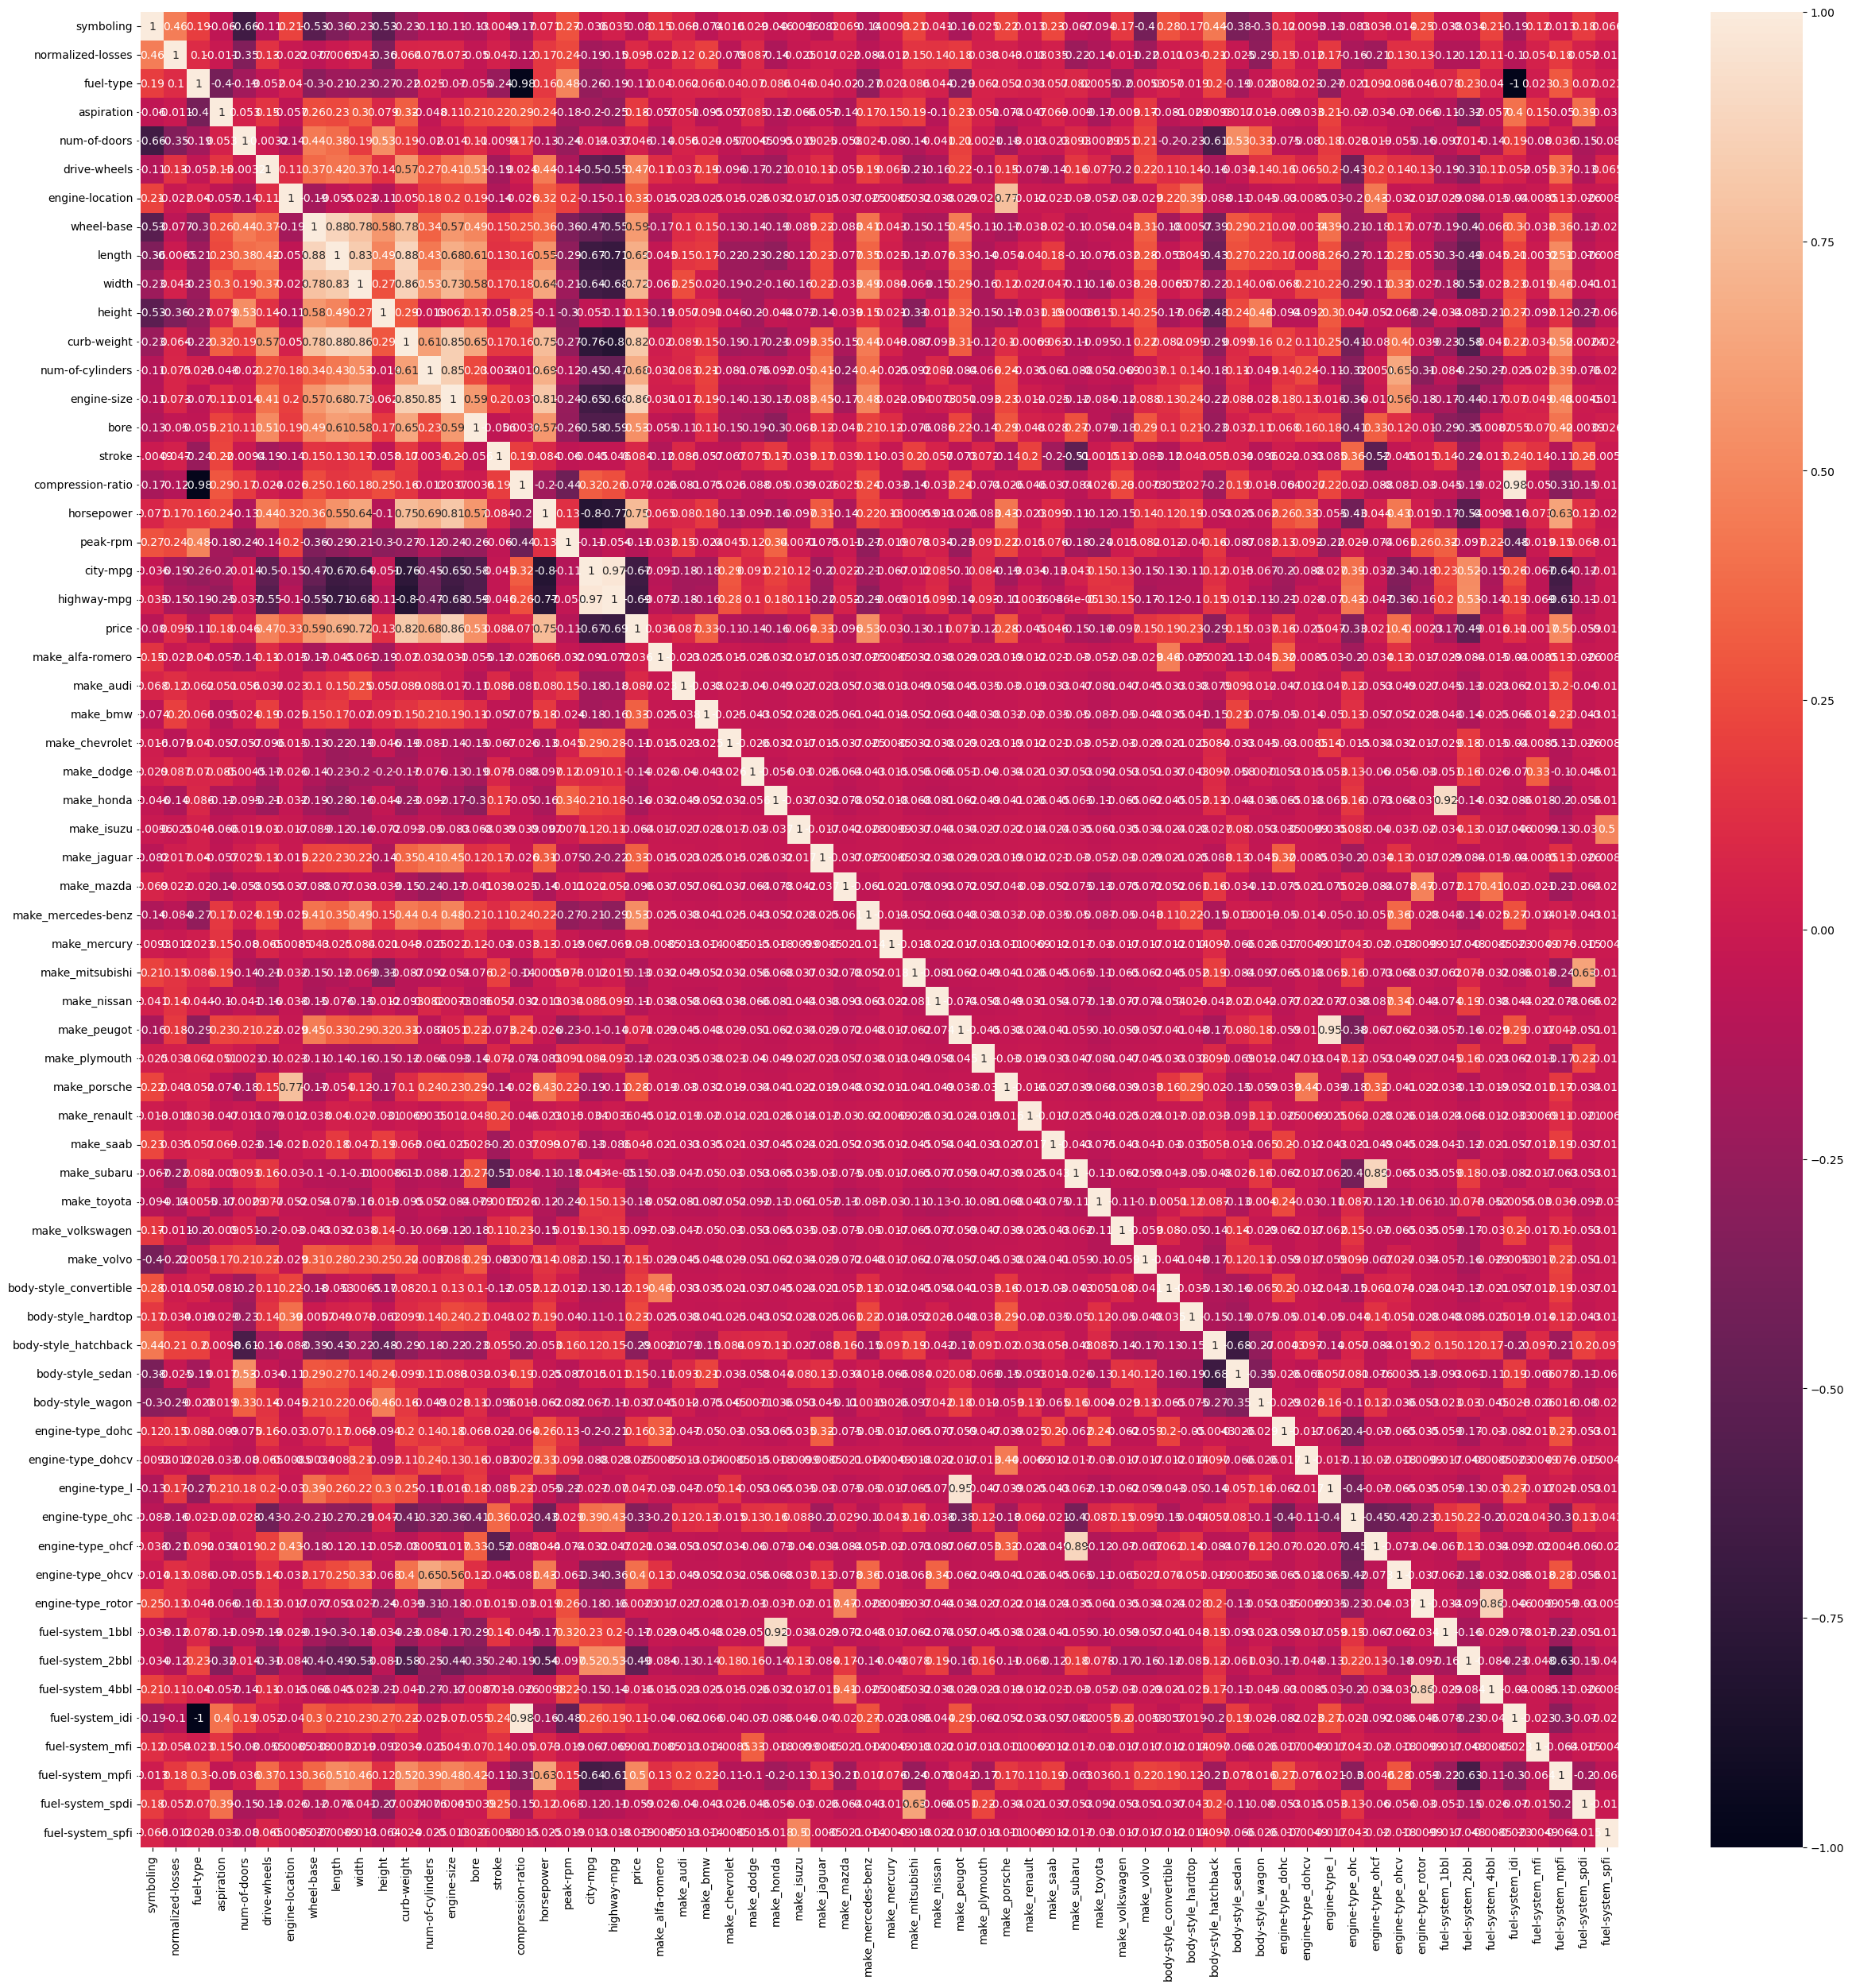

In [185]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)

In [186]:
x=df.drop('price',axis=1)
y=df['price']

In [187]:
# Traing test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.02,random_state=12)

In [188]:
x_train

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
55,3,150,1,0,2,1,0,95,169,65,...,0,1,0,0,1,0,0,0,0,0
61,1,129,1,0,2,0,0,98,177,66,...,0,0,0,1,0,0,0,0,0,0
122,1,154,1,0,4,0,0,93,167,63,...,0,0,0,1,0,0,0,0,0,0
156,0,91,1,0,4,0,0,95,166,64,...,0,0,0,1,0,0,0,0,0,0
7,1,115,1,0,4,0,0,105,192,71,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2,164,1,0,4,0,0,99,176,66,...,0,0,0,0,0,0,0,1,0,0
130,0,115,1,0,4,0,0,96,181,66,...,0,0,0,0,0,0,0,1,0,0
134,3,150,1,0,2,0,0,99,186,66,...,0,0,0,0,0,0,0,1,0,0
155,0,91,1,0,4,2,0,95,169,63,...,0,0,0,1,0,0,0,0,0,0


In [189]:
y_train

55     10945.0
61     10595.0
122     7609.0
156     6938.0
7      18920.0
        ...   
3      13950.0
130     9295.0
134    15040.0
155     8778.0
75     16503.0
Name: price, Length: 200, dtype: float64

In [190]:
x_test

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
32,1,101,1,0,2,0,0,93,150,64,...,0,0,1,0,0,0,0,0,0,0
6,1,158,1,0,4,0,0,105,192,71,...,0,0,0,0,0,0,0,1,0,0
135,2,104,1,0,4,0,0,99,186,66,...,0,0,0,0,0,0,0,1,0,0
124,3,115,1,1,2,1,0,95,173,66,...,0,0,0,0,0,0,0,0,1,0
11,0,192,1,0,4,1,0,101,176,64,...,0,0,0,0,0,0,0,1,0,0


In [191]:
y_test

32      5399.0
6      17710.0
135    15510.0
124    12764.0
11     16925.0
Name: price, dtype: float64

# Model Training

In [192]:
model=LinearRegression()

In [193]:
model

LinearRegression()

In [194]:
model.fit(x_train,y_train)

LinearRegression()

In [195]:
# Evaluation metrics for testing data

y_pred=model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print("MSE= ",mse)
rmse=np.sqrt(mse)
print("RMSE= ",rmse)
mae=mean_absolute_error(y_test,y_pred)
print("MAE= ",mae)
r2=r2_score(y_test,y_pred)
print("R2= ",r2)
direct_r2_score = model.score(x_test,y_test)
print("Direct R2= ",direct_r2_score)
adj_r2= 1- (((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("ADJ R2= ",adj_r2)


MSE=  3952971.8278322266
RMSE=  1988.2081952934975
MAE=  1732.456515351821
R2=  0.8014223615382242
Direct R2=  0.8014223615382242
ADJ R2=  1.0134628907431713


In [196]:
x_test.shape[1]

63

In [197]:
# Evaluation metrics for training data

y_pred_train=model.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print("MSE= ",mse)
rmse=np.sqrt(mse)
print("RMSE= ",rmse)
mae=mean_absolute_error(y_train,y_pred_train)
print("MAE= ",mae)
r2=r2_score(y_train,y_pred_train)
print("R2= ",r2)
direct_r2_score = model.score(x_train,y_train)
print("Direct R2= ",direct_r2_score)
adj_r2= 1- (((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1))
print("ADJ R2= ",adj_r2)


MSE=  2749812.233979629
RMSE=  1658.2557806260254
MAE=  1147.9135036903986
R2=  0.9562255913735473
Direct R2=  0.9562255913735473
ADJ R2=  0.9359477403186465


In [198]:
# If there is huge difference between RMSE and  MAE means the outliers are present else they are not

In [199]:
# Training data 95%
# Testing data 80%

# Overfitting is happening

# Testing for user input value

In [200]:
x.head(1)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115,1,0,2,1,0,88,168,64,...,0,0,0,0,0,0,0,1,0,0


In [201]:
symboling = 3.00
normalized_losses = 118.00
fuel_type = "gas"
aspiration = "turbo"
num_of_doors = "four"
drive_wheels = "4wd"
engine_location = "rear"
wheel_base = 88.60
length = 170.80
width = 64.10
height = 50.80
curb_weight = 2600.00
num_of_cylinders = "five"
engine_size = 130.00
bore = 3.47
stroke = 2.68
compression_ratio = 9.00
horsepower = 111.00
peak_rpm = 6000.00
city_mpg = 21.00
highway_mpg = 27.00

# onehot encoded columns
engine_type = "ohc"
body_style = "sedan"
fuel_system = "mpfi"
make = "audi" 

In [220]:
array=np.zeros(len(x.columns),dtype=int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [221]:
#Label encodings columns

print(fuel_type_values)
print(aspiration_values)
print(num_of_doors_values)
print(drive_wheels_values)
print(engine_location_values)
print(num_of_cylinders_values)

{'gas': 1, 'diesel': 0}
{'std': 0, 'turbo': 1}
{'four': 4, 'two': 2}
{'fwd': 0, 'rwd': 1, '4wd': 2}
{'front': 0, 'rear': 1}
{'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}


In [222]:
# Explaination

# drive_wheels = "4wd"
engine_location = "rear"
print(engine_location_values)#={'front': 0, 'rear': 1}
engine_location_values[engine_location]


{'front': 0, 'rear': 1}


1

In [223]:
# onehot encoded columns
engine_type_col = "engine-type_"+engine_type
body_style_col = "body-style_"+body_style
fuel_system_col = "fuel-system_"+fuel_system
make_col = "make_"+make 

print(engine_type_col)
print(body_style_col)
print(fuel_system_col)
print(make_col)

engine-type_ohc
body-style_sedan
fuel-system_mpfi
make_audi


In [224]:
column_names=x.columns

In [225]:
column_names

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-type_ohcv', 'engine-type_rotor',
       'f

In [226]:
# engine_type_col = "engine-type_"+engine_type
# body_style_col = "body-style_"+body_style
# fuel_system_col = "fuel-system_"+fuel_system
# make_col = "make_"+make 


engine_type_index=np.where(column_names==engine_type_col)[0][0]
body_style_index=np.where(column_names==body_style_col)[0][0]
fuel_system_index=np.where(column_names==fuel_system_col)[0][0]
make_index=np.where(column_names==make_col)[0][0]

print("engine_type_index",engine_type_index)
print("body_style_index",body_style_index)
print("fuel_system_index",fuel_system_index)
print("make_index",make_index)

engine_type_index 51
body_style_index 46
fuel_system_index 60
make_index 22


In [229]:
# 'symboling', 'normalized-losses', 'fuel-type', 'aspiration',
#        'num-of-doors', 'drive-wheels', 'engine-location', 'wheel-base',
#        'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
#        'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
#        'peak-rpm', 'city-mpg', 'highway-mpg',
        
array[0]=symboling
array[1]=normalized_losses
array[2]=fuel_type_values[fuel_type]
array[3]=aspiration_values[aspiration]
array[4]=num_of_doors_values[num_of_doors]
array[5]=drive_wheels_values[drive_wheels]
array[6]=engine_location_values[engine_location]
array[7]=wheel_base
array[8]=length
array[9]=width
array[10]=height
array[11]=curb_weight
array[12]=num_of_cylinders_values[num_of_cylinders]
array[13]=engine_size
array[14]=bore
array[15]=stroke
array[16]=compression_ratio
array[17]=horsepower
array[18]=peak_rpm
array[19]=city_mpg
array[20]=highway_mpg

#one hot encoded columns index we need to find first as we cannot manual know 
# and then put that index to enable the column

array[engine_type_index]=1
array[body_style_index]=1
array[fuel_system_index]=1
array[make_index]=1


array

array([   3,  118,    1,    1,    4,    2,    1,   88,  170,   64,   50,
       2600,    5,  130,    3,    2,    9,  111, 6000,   21,   27,    0,
          1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,    0,    0,    0,    0,    1,    0,    0,    0,
          0,    0,    0,    0,    0,    1,    0,    0])

In [232]:
#Just for reference to test if we directly take x.columns

fuel_system_index2=np.where(x.columns==fuel_system_col)[0][0]
fuel_system_index2

60

In [242]:
# prediction=model.predict([array])  #2D array
# print("Prediction of your car Price is : $", round(prediction[0], 2))   

#OR

prediction=model.predict([array])[0]  #2D array
print("Prediction of your car Price is : $", round(prediction, 2))

Prediction of your car Price is : $ 24672.1


# Saving all the dictionaries in JSON format to further run on any device

In [243]:
# Saving all the dictionaries in JSON format

label_encoded_columns_dict = {"fuel_type_values":fuel_type_values,
                              "aspiration_values":aspiration_values,
                              "num_of_doors_values":num_of_doors_values,
                              "num_of_cylinders_values":num_of_cylinders_values,
                              "drive_wheels_values":drive_wheels_values,
                              "engine_location_values":engine_location_values,
                              "column_names": list(x.columns)}  # required list here not an array
label_encoded_columns_dict

{'fuel_type_values': {'gas': 1, 'diesel': 0},
 'aspiration_values': {'std': 0, 'turbo': 1},
 'num_of_doors_values': {'four': 4, 'two': 2},
 'num_of_cylinders_values': {'four': 4,
  'six': 6,
  'five': 5,
  'eight': 8,
  'two': 2,
  'three': 3,
  'twelve': 12},
 'drive_wheels_values': {'fwd': 0, 'rwd': 1, '4wd': 2},
 'engine_location_values': {'front': 0, 'rear': 1},
 'column_names': ['symboling',
  'normalized-losses',
  'fuel-type',
  'aspiration',
  'num-of-doors',
  'drive-wheels',
  'engine-location',
  'wheel-base',
  'length',
  'width',
  'height',
  'curb-weight',
  'num-of-cylinders',
  'engine-size',
  'bore',
  'stroke',
  'compression-ratio',
  'horsepower',
  'peak-rpm',
  'city-mpg',
  'highway-mpg',
  'make_alfa-romero',
  'make_audi',
  'make_bmw',
  'make_chevrolet',
  'make_dodge',
  'make_honda',
  'make_isuzu',
  'make_jaguar',
  'make_mazda',
  'make_mercedes-benz',
  'make_mercury',
  'make_mitsubishi',
  'make_nissan',
  'make_peugot',
  'make_plymouth',
  'make_

In [244]:
#Saving JSON of all the columns

import json

In [245]:
with open("LinearRegmodel.json",'w')as f:
    json.dump(label_encoded_columns_dict,f)

In [246]:
model

LinearRegression()

In [248]:
#save pickle file with Regression model instance

import pickle

with open("LinearRegmodel.pkl",'wb') as f:
    pickle.dump(model,f)